In [1]:
# by Joh Schöneberg 2018

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pathOfTheYeastTrackAnalysisFolder = '/Users/sun.hong/Desktop/YeastTrackAnalysis-master/'
#pathOfTheYeastTrackAnalysisFolder = '/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/'

import sys
pythonPackagePath = pathOfTheYeastTrackAnalysisFolder+"/src/"
sys.path.append(pythonPackagePath)
import YeastTrackFunctions as ytf

In [2]:
# from https://stackoverflow.com/questions/10481990/matplotlib-axis-with-two-scales-shared-origin
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)

# input data

In [3]:
path = "/Users/sun.hong/Desktop/YeastTrackAnalysis-master/dataToAnalyze/"
#path = "/Users/johannesschoeneberg/Desktop/SchoenebergLab/imageAnalysis_Yidi_Sun/data_2018-08-29/08132018_for_Joh/abp1gfp_and_fim1gfp_110msec_07232018/"


#what data is good for inflection point

# the fim1 dynamics, do not exclude much (or anything), this is good for the intensity alignment point!



################
# THESE ARE THE ONLY PARAMETERS TO CHANGE

# change your filename to the file you want to analyze
path_to_all_tracks_data = path+"sla1s/"
#path_to_all_tracks_data = path+"budding_yeast_abp1_gfp/"

allTracksFilename = 'all_tracks.csv'

# 
frameToSecondConversion = 0.311
pixelToNanometerConversion = 65



###
# FOR FUTURE, do not change (yet)
###
# determine alignment method
#alignmentMethod = 'inflectionPoint'

alignmentMethod = 'intensity'
align_intensity_threshold = 0.5 # 50% intensity alignment

################


outputpath = path_to_all_tracks_data

In [4]:
filenamesData = pd.read_csv(outputpath+allTracksFilename+"_allProcessedFilePaths.csv")
filenamesData[0:5]

,Unnamed: 0,filenames
0,0,/Users/sun.hong/Desktop/YeastTrackAnalysis-mas...
1,1,/Users/sun.hong/Desktop/YeastTrackAnalysis-mas...
2,2,/Users/sun.hong/Desktop/YeastTrackAnalysis-mas...
3,3,/Users/sun.hong/Desktop/YeastTrackAnalysis-mas...
4,4,/Users/sun.hong/Desktop/YeastTrackAnalysis-mas...


In [5]:
# get all lifetimes

trackIds = []
lifetimes_frames = []
lifetimes_seconds = []
maxIntensities = []

filenames = filenamesData['filenames']
for filename in filenames:

    data = pd.read_csv(filename)
    
    max_intensity_AU = data['max_intensity_AU'][0]
    lifetime_frames = data['lifetime_frames'][0]
    lifetime_seconds = data['lifetime_seconds'][0]
    trackId = data['Trajectory'][0]
    
    trackIds.append(trackId)
    lifetimes_frames.append(lifetime_frames)
    lifetimes_seconds.append(lifetime_seconds)
    maxIntensities.append(max_intensity_AU)

# export these values into an excel
combinedDataFilePath = outputpath+allTracksFilename+'_allProcessedFiles_summary.csv'
print(combinedDataFilePath)
df = pd.DataFrame()
df['trackIds'] = trackIds
df['lifetimes_frames'] = lifetimes_frames
df['lifetimes_seconds'] = lifetimes_seconds
df['maxIntensities'] = maxIntensities
df.to_csv(combinedDataFilePath)

/Users/sun.hong/Desktop/YeastTrackAnalysis-master/dataToAnalyze/sla1s/all_tracks.csv_allProcessedFiles_summary.csv


In [6]:
print(lifetimes_frames)

[100, 71, 80, 74, 87, 91, 61, 47, 65, 54, 63, 63, 60, 75, 74, 95, 48, 99, 86, 65, 93]


/Users/sun.hong/Desktop/YeastTrackAnalysis-master/dataToAnalyze/sla1s/plot_lifetime_frames_distribution.png


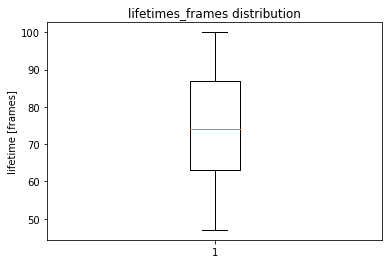

In [7]:
plt.boxplot(lifetimes_frames)
plt.title('lifetimes_frames distribution')
plt.ylabel('lifetime [frames]')
outputFigurePath= outputpath+"plot_lifetime_frames_distribution.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

/Users/sun.hong/Desktop/YeastTrackAnalysis-master/dataToAnalyze/sla1s/plot_lifetime_seconds_distribution.png


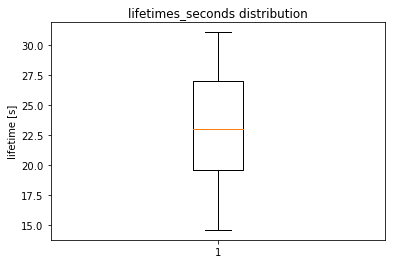

In [8]:
plt.boxplot(lifetimes_seconds)
plt.title('lifetimes_seconds distribution')
plt.ylabel('lifetime [s]')
outputFigurePath= outputpath+"plot_lifetime_seconds_distribution.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

/Users/sun.hong/Desktop/YeastTrackAnalysis-master/dataToAnalyze/sla1s/plot_maxIntensity_distribution.png


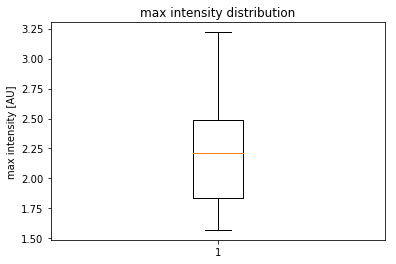

In [9]:
plt.boxplot(maxIntensities)
plt.title('max intensity distribution')
plt.ylabel('max intensity [AU]')
outputFigurePath= outputpath+"plot_maxIntensity_distribution.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

# Averaging - Align by Distance

/Users/sun.hong/Desktop/YeastTrackAnalysis-master/dataToAnalyze/sla1s/plot_alignedByDistance_intensity_individuals.png


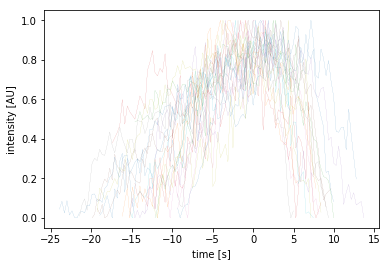

In [10]:
filenames = filenamesData['filenames']
for filename in filenames:

    data = pd.read_csv(filename)
    
    x = data['x'].values
    y = data['y'].values
    intensity = data['m0']
    distance = data['distance[nm]']
    speed = data['speed[nm]']
    time = data['time[s]']
    
    # single point data
    inflectionPointIndex = data['inflectionPointIndex'][0]
    inflectionPoint_fromIntensity_Index = data['inflectionPoint_fromIntensity_Index'][0]
    inflectionPointIndex = data['inflectionPointIndex'][0]
    inflectionPointFrame = data['inflectionPointFrame'][0]
    inflectionPointTime = data['inflectionPointTime'][0]
    inflectionPointIntensity = data['inflectionPointIntensity'][0]
    max_intensity_AU = data['max_intensity_AU'][0]
    lifetime_frames = data['lifetime_frames'][0]
    lifetime_seconds = data['lifetime_seconds'][0]
    trackId = data['Trajectory'][0]
    
    ################
    # 4th subplot
    ################
    
    
    #plt.plot(time-inflectionPointTime,(distance-np.min(distance))/np.max(distance-np.min(distance)),lw=3)
    plt.plot(time-inflectionPointTime,(intensity-np.min(intensity))/np.max(intensity-np.min(intensity)),lw=0.1)
    
    plt.xlabel('time [s]')
    plt.ylabel('intensity [AU]')
    
outputFigurePath= outputpath+"plot_alignedByDistance_intensity_individuals.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)
    
    

/Users/sun.hong/Desktop/YeastTrackAnalysis-master/dataToAnalyze/sla1s/plot_alignedByDistance_distance_individuals.png


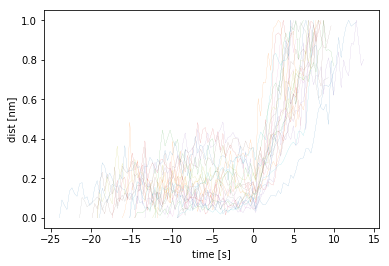

In [11]:
filenames = filenamesData['filenames']
for filename in filenames:

    data = pd.read_csv(filename)
    
    x = data['x'].values
    y = data['y'].values
    intensity = data['m0']
    distance = data['distance[nm]']
    speed = data['speed[nm]']
    time = data['time[s]']
    
    # single point data
    inflectionPointIndex = data['inflectionPointIndex'][0]
    inflectionPoint_fromIntensity_Index = data['inflectionPoint_fromIntensity_Index'][0]
    inflectionPointIndex = data['inflectionPointIndex'][0]
    inflectionPointFrame = data['inflectionPointFrame'][0]
    inflectionPointTime = data['inflectionPointTime'][0]
    inflectionPointIntensity = data['inflectionPointIntensity'][0]
    max_intensity_AU = data['max_intensity_AU'][0]
    lifetime_frames = data['lifetime_frames'][0]
    lifetime_seconds = data['lifetime_seconds'][0]
    trackId = data['Trajectory'][0]
    
    ################
    # 4th subplot
    ################
    
    
    plt.plot(time-inflectionPointTime,(distance-np.min(distance))/np.max(distance-np.min(distance)),lw=0.1)
    #plt.plot(time-inflectionPointTime,(intensity-np.min(intensity))/np.max(intensity-np.min(intensity)),lw=1)
    
    plt.xlabel('time [s]')
    plt.ylabel('dist [nm]')
    
outputFigurePath= outputpath+"plot_alignedByDistance_distance_individuals.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)
    

In [12]:
allFramesAccumulated_intensity = []
allFramesAccumulated_distance = []
accumulatorSize = 1000
accumulatorZeroIndex = 500

N = 0

filenames = filenamesData['filenames']
for filename in filenames:
    
    framesAccumulator_intensity = np.zeros(accumulatorSize)
    framesAccumulator_distance = np.zeros(accumulatorSize)

    N += 1

    data = pd.read_csv(filename)
    
    x = data['x'].values
    y = data['y'].values
    intensity = data['m0']
    distance = data['distance[nm]']
    speed = data['speed[nm]']
    time = data['time[s]']
    
    # single point data
    inflectionPointIndex = data['inflectionPointIndex'][0]
    inflectionPoint_fromIntensity_Index = data['inflectionPoint_fromIntensity_Index'][0]
    inflectionPointIndex = data['inflectionPointIndex'][0]
    inflectionPointFrame = data['inflectionPointFrame'][0]
    inflectionPointTime = data['inflectionPointTime'][0]
    inflectionPointIntensity = data['inflectionPointIntensity'][0]
    max_intensity_AU = data['max_intensity_AU'][0]
    lifetime_frames = data['lifetime_frames'][0]
    lifetime_seconds = data['lifetime_seconds'][0]
    trackId = data['Trajectory'][0]
    
#    print(inflectionPointIndex)
    for dataIndex in range(0,len(time)):
        accumulatorIndex = accumulatorZeroIndex - inflectionPointIndex + dataIndex
        framesAccumulator_intensity[accumulatorIndex] =  framesAccumulator_intensity[accumulatorIndex] + intensity[dataIndex]
        framesAccumulator_distance[accumulatorIndex] =  framesAccumulator_distance[accumulatorIndex] + distance[dataIndex]
        
    
    framesAccumulator_intensity = np.array(framesAccumulator_intensity)
    allFramesAccumulated_intensity.append(framesAccumulator_intensity)
    
    
    framesAccumulator_distance = np.array(framesAccumulator_distance)
    allFramesAccumulated_distance.append(framesAccumulator_distance)

    secondsPerFrame = np.diff(time)[0]
    time = secondsPerFrame*(np.array(range(0,accumulatorSize))-(accumulatorZeroIndex-inflectionPointIndex))

  
    

/Users/sun.hong/Desktop/YeastTrackAnalysis-master/dataToAnalyze/sla1s/plot_alignedByDistance.png


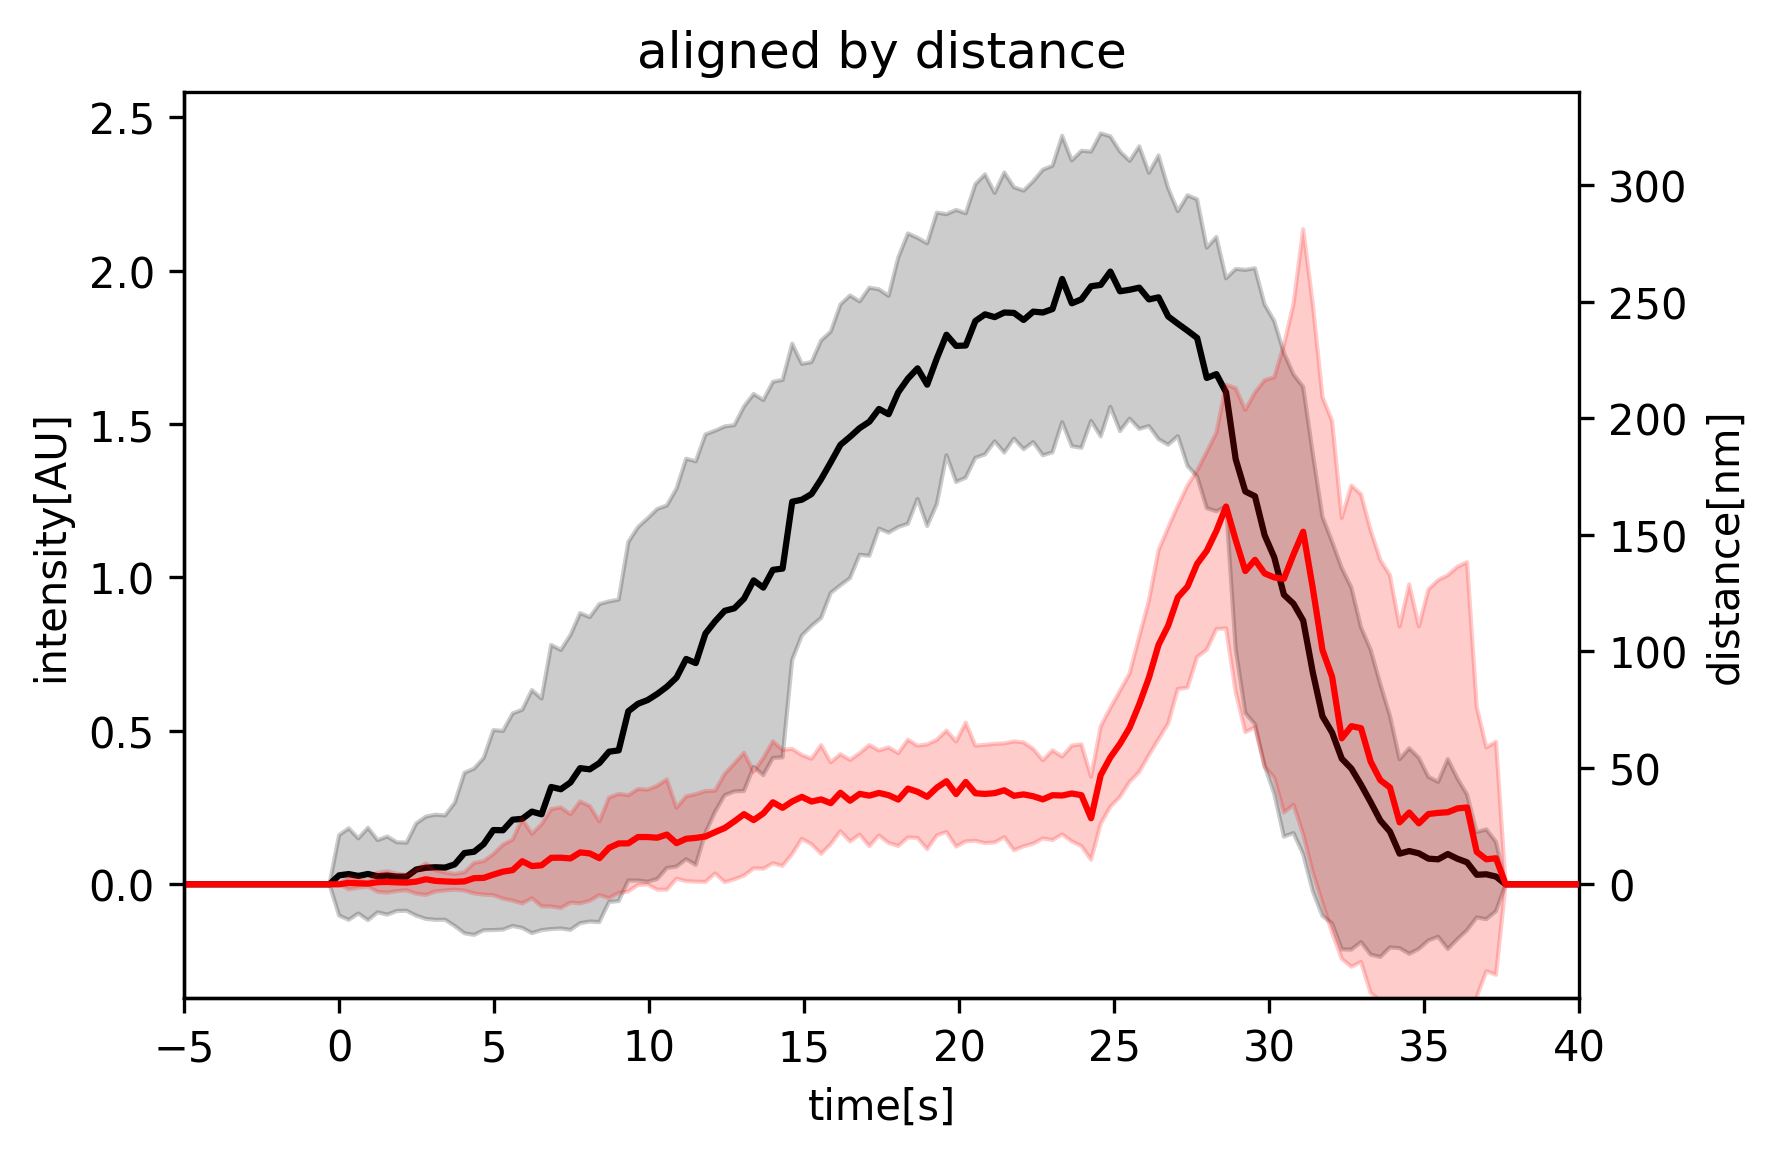

In [13]:



fig, ax1 = plt.subplots(dpi=300)
ax2 = ax1.twinx() # ax2 and ax1 will have common x axis and different y axis

#time = np.nanmean(adjusted_sampled_times,axis=0)

#intensity

mean = np.nanmean(allFramesAccumulated_intensity,axis=0)
std = np.nanstd(allFramesAccumulated_intensity,axis=0)

#plots the average of intensity
ax1.plot(time,mean,color='k')
#plots the standard deviation of intensity
ax1.fill_between(time, (mean-std), (mean+std),color='k',alpha=0.2)
ax1.set_ylabel('intensity[AU]')

int_mean = mean
int_std = std
int_mean_norm = mean/max(mean)
int_std_norm = std/max(mean)


#distance



mean = np.nanmean(allFramesAccumulated_distance,axis=0)
std = np.nanstd(allFramesAccumulated_distance,axis=0)

#plots the average of intensity
ax2.plot(time,mean,color='r')
#plots the standard deviation of intensity
ax2.fill_between(time, (mean-std) , (mean+std),color='red',alpha=0.2)
ax2.set_ylabel('distance[nm]')

dist_mean = mean
dist_std = std
dist_mean_norm = mean/max(mean)
dist_std_norm = std/max(mean)

ax1.set_xlabel("time[s]")



plt.title("aligned by distance")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(-5,40)
#ax1.set_ylim(-0.2,1.5)
#ax2.set_ylim(-0.2,1.5)
#plt.xlim(400,700)
align_yaxis(ax1, 0, ax2, 0)

outputFigurePath= outputpath+"plot_alignedByDistance.png"
print(outputFigurePath)


plt.savefig(outputFigurePath)


df = pd.DataFrame()
df['time[frames]'] = time
df['multi_alignedByDistance_intensity_mean'] = int_mean
df['multi_alignedByDistance_intensity_std'] = int_std
df['multi_alignedByDistance_intensity_mean_normalized'] = int_mean_norm
df['multi_alignedByDistance_intensity_std_normalized'] = int_std_norm

df['multi_alignedByDistance_distance_mean'] = dist_mean
df['multi_alignedByDistance_distance_std'] = dist_std
df['multi_alignedByDistance_distance_mean_normalized'] = dist_mean_norm
df['multi_alignedByDistance_distance_std_normalized'] = dist_std_norm

outputDataFilePath = outputpath+'output_alignedByDistance.csv'
df.to_csv(outputDataFilePath)

/Users/sun.hong/Desktop/YeastTrackAnalysis-master/dataToAnalyze/sla1s/plot_alignedByDistance_normalized.png


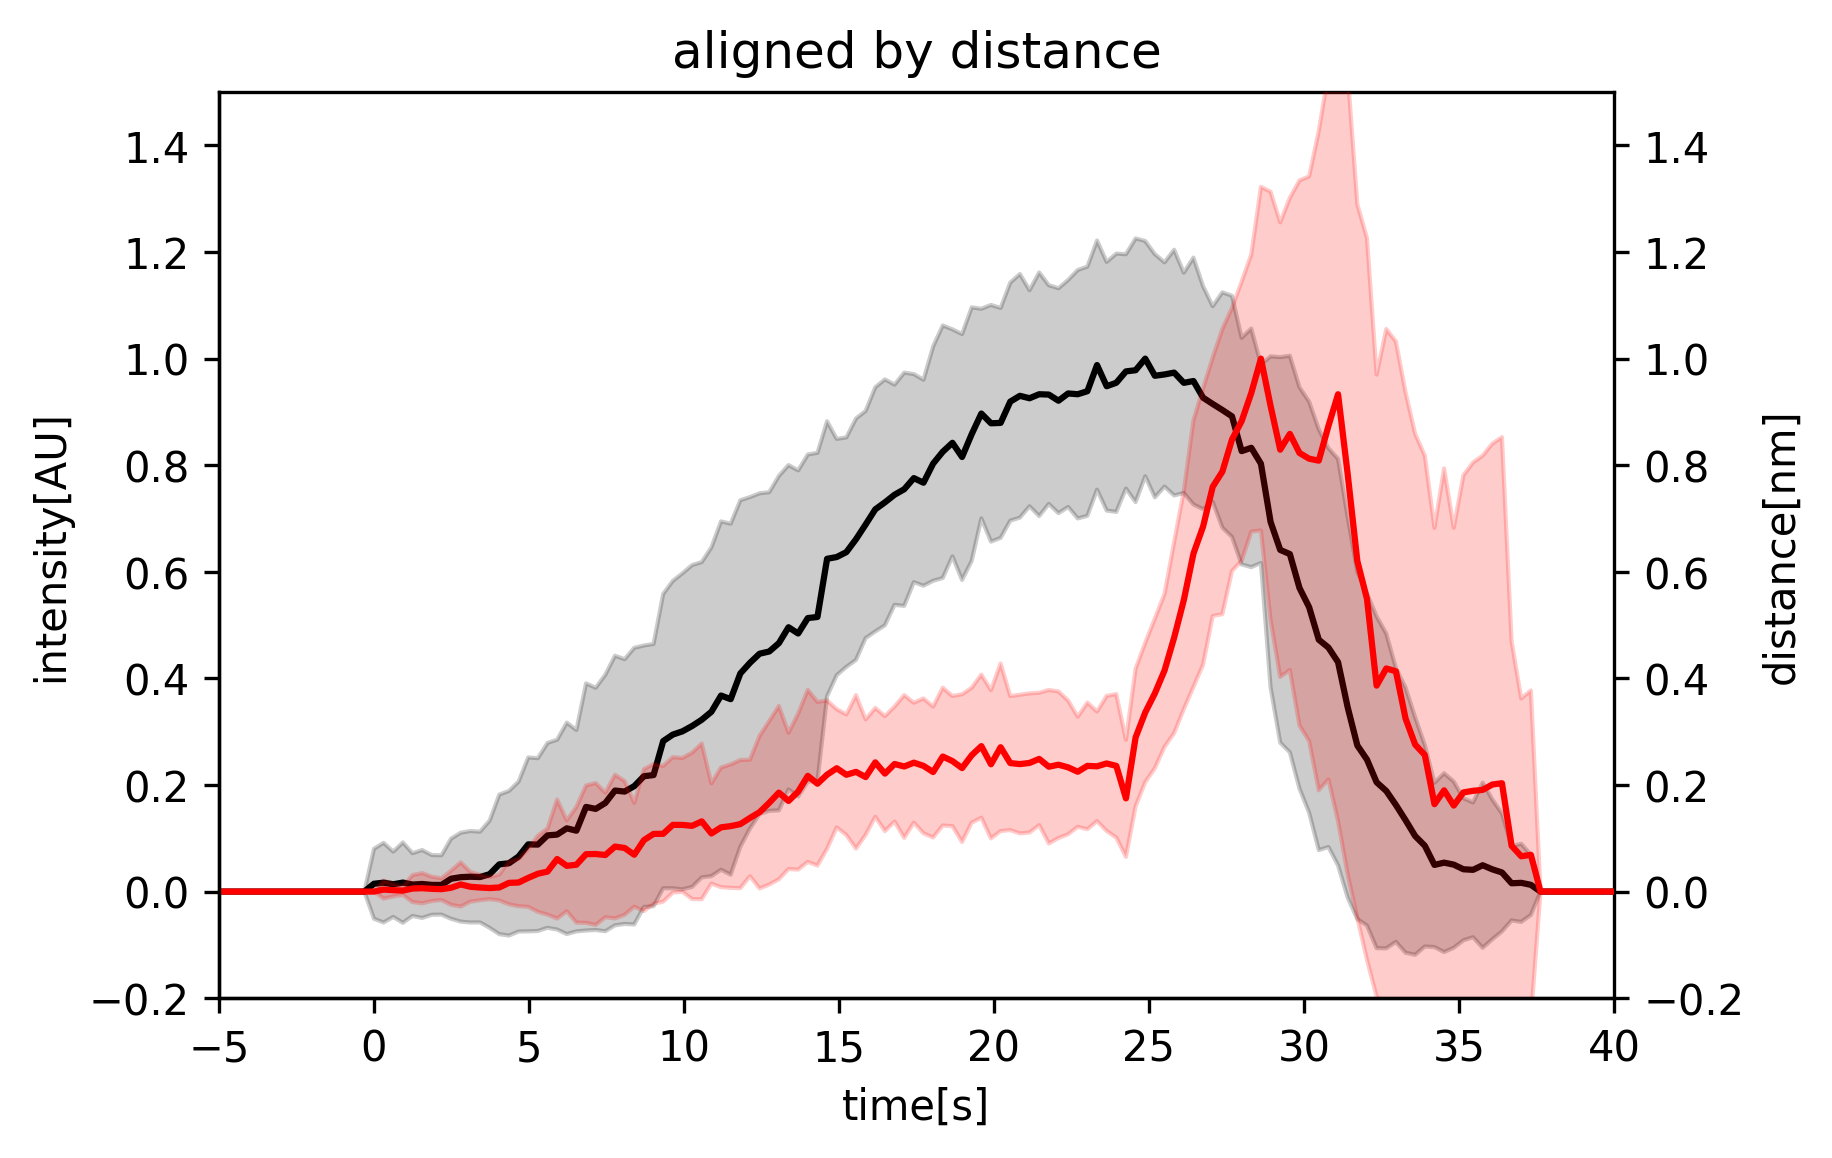

In [14]:



fig, ax1 = plt.subplots(dpi=300)
ax2 = ax1.twinx() # ax2 and ax1 will have common x axis and different y axis

#time = np.nanmean(adjusted_sampled_times,axis=0)


#intensity

mean = np.nanmean(allFramesAccumulated_intensity,axis=0)
std = np.nanstd(allFramesAccumulated_intensity,axis=0)

#plots the average of intensity
ax1.plot(time,mean/max(mean),color='k')
#plots the standard deviation of intensity
ax1.fill_between(time, (mean-std)/max(mean), (mean+std)/max(mean),color='k',alpha=0.2)
ax1.set_ylabel('intensity[AU]')

int_mean = mean
int_std = std
int_mean_norm = mean/max(mean)
int_std_norm = std/max(mean)


#distance



mean = np.nanmean(allFramesAccumulated_distance,axis=0)
std = np.nanstd(allFramesAccumulated_distance,axis=0)

#plots the average of intensity
ax2.plot(time,mean/max(mean),color='r')
#plots the standard deviation of intensity
ax2.fill_between(time, (mean-std)/max(mean) , (mean+std)/max(mean),color='red',alpha=0.2)
ax2.set_ylabel('distance[nm]')

dist_mean = mean
dist_std = std
dist_mean_norm = mean/max(mean)
dist_std_norm = std/max(mean)





plt.title("aligned by distance")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

ax1.set_ylim(-0.2,1.5)
ax2.set_ylim(-0.2,1.5)

##########
# Change this to change plotting window (x-axis)
##########
plt.xlim(-5,40)

ax1.set_xlabel("time[s]")


outputFigurePath= outputpath+"plot_alignedByDistance_normalized.png"
print(outputFigurePath)


plt.savefig(outputFigurePath)


df = pd.DataFrame()
df['time[frames]'] = time
df['multi_alignedByDistance_intensity_mean'] = int_mean
df['multi_alignedByDistance_intensity_std'] = int_std
df['multi_alignedByDistance_intensity_mean_normalized'] = int_mean_norm
df['multi_alignedByDistance_intensity_std_normalized'] = int_std_norm

df['multi_alignedByDistance_distance_mean'] = dist_mean
df['multi_alignedByDistance_distance_std'] = dist_std
df['multi_alignedByDistance_distance_mean_normalized'] = dist_mean_norm
df['multi_alignedByDistance_distance_std_normalized'] = dist_std_norm

outputDataFilePath = outputpath+'output_alignedByDistance.csv'
df.to_csv(outputDataFilePath)

# Averaging - Align by Intensity

/Users/sun.hong/Desktop/YeastTrackAnalysis-master/dataToAnalyze/sla1s/plot_alignedByIntensity_intensity_individuals.png


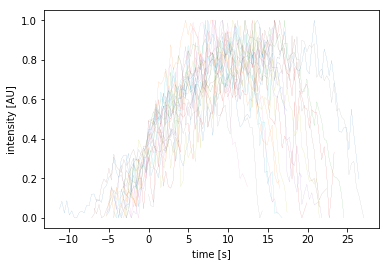

In [15]:
filenames = filenamesData['filenames']
for filename in filenames:

    data = pd.read_csv(filename)
    
    x = data['x'].values
    y = data['y'].values
    intensity = data['m0']
    distance = data['distance[nm]']
    speed = data['speed[nm]']
    time = data['time[s]']
    
    # single point data
    inflectionPointIndex = data['inflectionPoint_fromIntensity_Index'][0]
    inflectionPointTime = data['inflectionPoint_fromIntensity_Time'][0]
    inflectionPointIntensity = data['inflectionPointIntensity'][0]
    max_intensity_AU = data['max_intensity_AU'][0]
    lifetime_frames = data['lifetime_frames'][0]
    lifetime_seconds = data['lifetime_seconds'][0]
    trackId = data['Trajectory'][0]
    
    ################
    # 4th subplot
    ################
    
    
    #plt.plot(time-inflectionPointTime,(distance-np.min(distance))/np.max(distance-np.min(distance)),lw=3)
    plt.plot(time-inflectionPointTime,(intensity-np.min(intensity))/np.max(intensity-np.min(intensity)),lw=0.1)
    
    plt.xlabel('time [s]')
    plt.ylabel('intensity [AU]')
    
outputFigurePath= outputpath+"plot_alignedByIntensity_intensity_individuals.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)
    

/Users/sun.hong/Desktop/YeastTrackAnalysis-master/dataToAnalyze/sla1s/plot_alignedByIntensity_distance_individuals.png


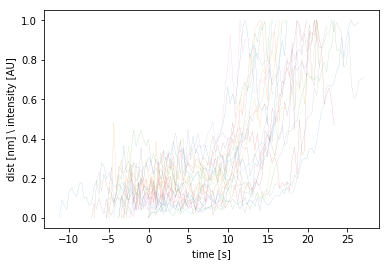

In [16]:
filenames = filenamesData['filenames']
for filename in filenames:

    data = pd.read_csv(filename)
    
    x = data['x'].values
    y = data['y'].values
    intensity = data['m0']
    distance = data['distance[nm]']
    speed = data['speed[nm]']
    time = data['time[s]']
    
    # single point data
    inflectionPointIndex = data['inflectionPoint_fromIntensity_Index'][0]
    inflectionPointTime = data['inflectionPoint_fromIntensity_Time'][0]
    inflectionPointIntensity = data['inflectionPointIntensity'][0]
    max_intensity_AU = data['max_intensity_AU'][0]
    lifetime_frames = data['lifetime_frames'][0]
    lifetime_seconds = data['lifetime_seconds'][0]
    trackId = data['Trajectory'][0]
    
    ################
    # 4th subplot
    ################
    
    
    plt.plot(time-inflectionPointTime,(distance-np.min(distance))/np.max(distance-np.min(distance)),lw=0.1)
    #plt.plot(time-inflectionPointTime,(intensity-np.min(intensity))/np.max(intensity-np.min(intensity)),lw=1)
    
    plt.xlabel('time [s]')
    plt.ylabel('dist [nm] \ intensity [AU]')
    
outputFigurePath= outputpath+"plot_alignedByIntensity_distance_individuals.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

In [17]:
allFramesAccumulated_intensity = []
allFramesAccumulated_distance = []
accumulatorSize = 1000
accumulatorZeroIndex = 500

N = 0

filenames = filenamesData['filenames']
for filename in filenames:
    
    framesAccumulator_intensity = np.zeros(accumulatorSize)
    framesAccumulator_distance = np.zeros(accumulatorSize)

    N += 1

    data = pd.read_csv(filename)
    
    x = data['x'].values
    y = data['y'].values
    intensity = data['m0']
    distance = data['distance[nm]']
    speed = data['speed[nm]']
    time = data['time[s]']
    

    
    # single point data

    inflectionPointIndex = data['inflectionPoint_fromIntensity_Index'][0]

    inflectionPointIntensity = data['inflectionPointIntensity'][0]
    max_intensity_AU = data['max_intensity_AU'][0]
    lifetime_frames = data['lifetime_frames'][0]
    lifetime_seconds = data['lifetime_seconds'][0]
    trackId = data['Trajectory'][0]
    
#    print(inflectionPointIndex)
    for dataIndex in range(0,len(time)):
        accumulatorIndex = accumulatorZeroIndex - inflectionPointIndex + dataIndex
        framesAccumulator_intensity[accumulatorIndex] =  framesAccumulator_intensity[accumulatorIndex] + intensity[dataIndex]
        framesAccumulator_distance[accumulatorIndex] =  framesAccumulator_distance[accumulatorIndex] + distance[dataIndex]
        
    
    framesAccumulator_intensity = np.array(framesAccumulator_intensity)
    allFramesAccumulated_intensity.append(framesAccumulator_intensity)
    
    
    framesAccumulator_distance = np.array(framesAccumulator_distance)
    allFramesAccumulated_distance.append(framesAccumulator_distance)

    secondsPerFrame = np.diff(time)[0]
    time = secondsPerFrame*(np.array(range(0,accumulatorSize))-(accumulatorZeroIndex-inflectionPointIndex))


  


/Users/sun.hong/Desktop/YeastTrackAnalysis-master/dataToAnalyze/sla1s/plot_alignedByIntensity_normalized.png


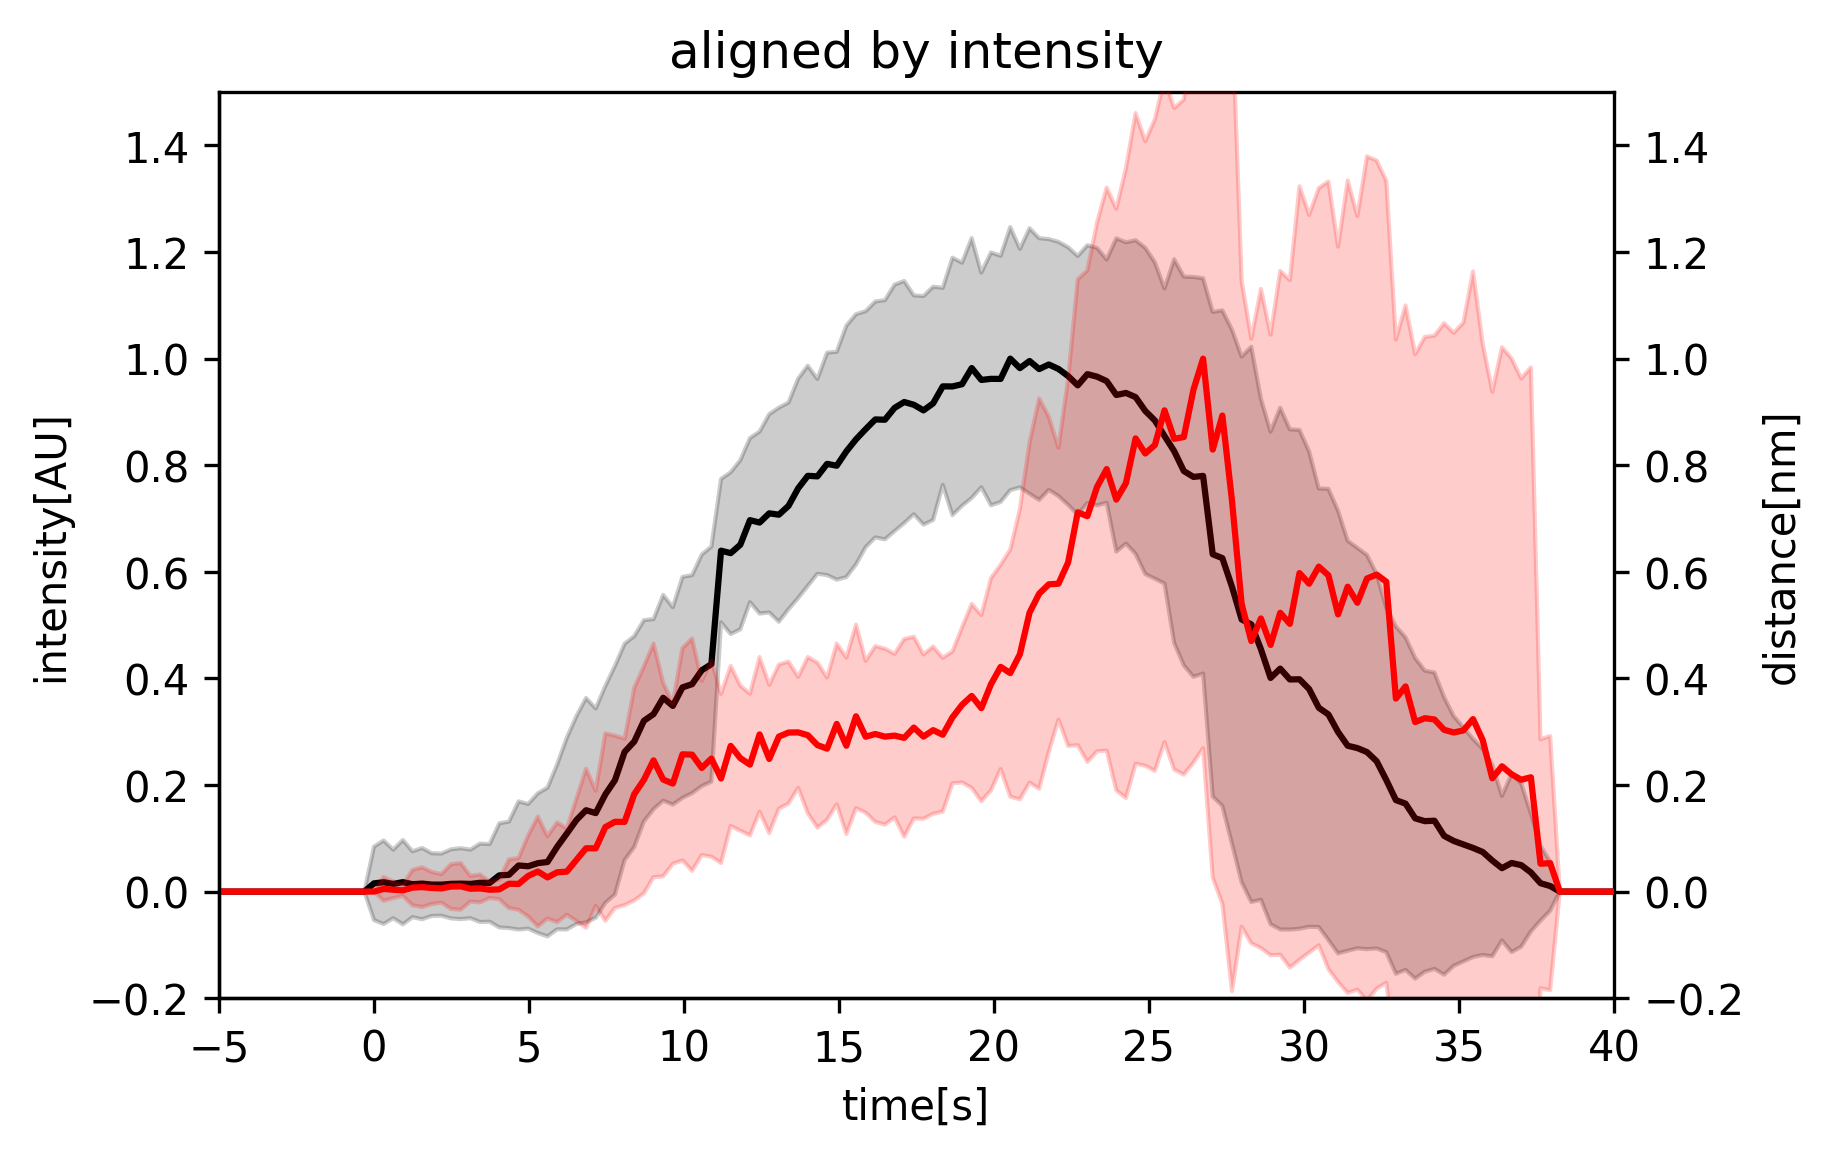

In [18]:



fig, ax1 = plt.subplots(dpi=300)
ax2 = ax1.twinx() # ax2 and ax1 will have common x axis and different y axis

#time = np.nanmean(adjusted_sampled_times,axis=0)


#intensity

mean = np.nanmean(allFramesAccumulated_intensity,axis=0)
std = np.nanstd(allFramesAccumulated_intensity,axis=0)

#plots the average of intensity
ax1.plot(time,mean/max(mean),color='k')
#plots the standard deviation of intensity
ax1.fill_between(time, (mean-std)/max(mean), (mean+std)/max(mean),color='k',alpha=0.2)
ax1.set_ylabel('intensity[AU]')

int_mean = mean
int_std = std
int_mean_norm = mean/max(mean)
int_std_norm = std/max(mean)


#distance



mean = np.nanmean(allFramesAccumulated_distance,axis=0)
std = np.nanstd(allFramesAccumulated_distance,axis=0)

#plots the average of intensity
ax2.plot(time,mean/max(mean),color='r')
#plots the standard deviation of intensity
ax2.fill_between(time, (mean-std)/max(mean) , (mean+std)/max(mean),color='red',alpha=0.2)
ax2.set_ylabel('distance[nm]')

dist_mean = mean
dist_std = std
dist_mean_norm = mean/max(mean)
dist_std_norm = std/max(mean)





plt.title("aligned by intensity")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

ax1.set_ylim(-0.2,1.5)
ax2.set_ylim(-0.2,1.5)
##########
# Change this to change plotting window (x-axis)
##########
plt.xlim(-5,40)

ax1.set_xlabel("time[s]")


outputFigurePath= outputpath+"plot_alignedByIntensity_normalized.png"
print(outputFigurePath)


plt.savefig(outputFigurePath)


df = pd.DataFrame()
df['time[frames]'] = time
df['multi_alignedByIntensity_intensity_mean'] = int_mean
df['multi_alignedByIntensity_intensity_std'] = int_std
df['multi_alignedByIntensity_intensity_mean_normalized'] = int_mean_norm
df['multi_alignedByIntensity_intensity_std_normalized'] = int_std_norm

df['multi_alignedByIntensity_distance_mean'] = dist_mean
df['multi_alignedByIntensity_distance_std'] = dist_std
df['multi_alignedByIntensity_distance_mean_normalized'] = dist_mean_norm
df['multi_alignedByIntensity_distance_std_normalized'] = dist_std_norm

outputDataFilePath = outputpath+'output_alignedByIntensity.csv'
df.to_csv(outputDataFilePath)

/Users/sun.hong/Desktop/YeastTrackAnalysis-master/dataToAnalyze/sla1s/plot_alignedByIntensity.png


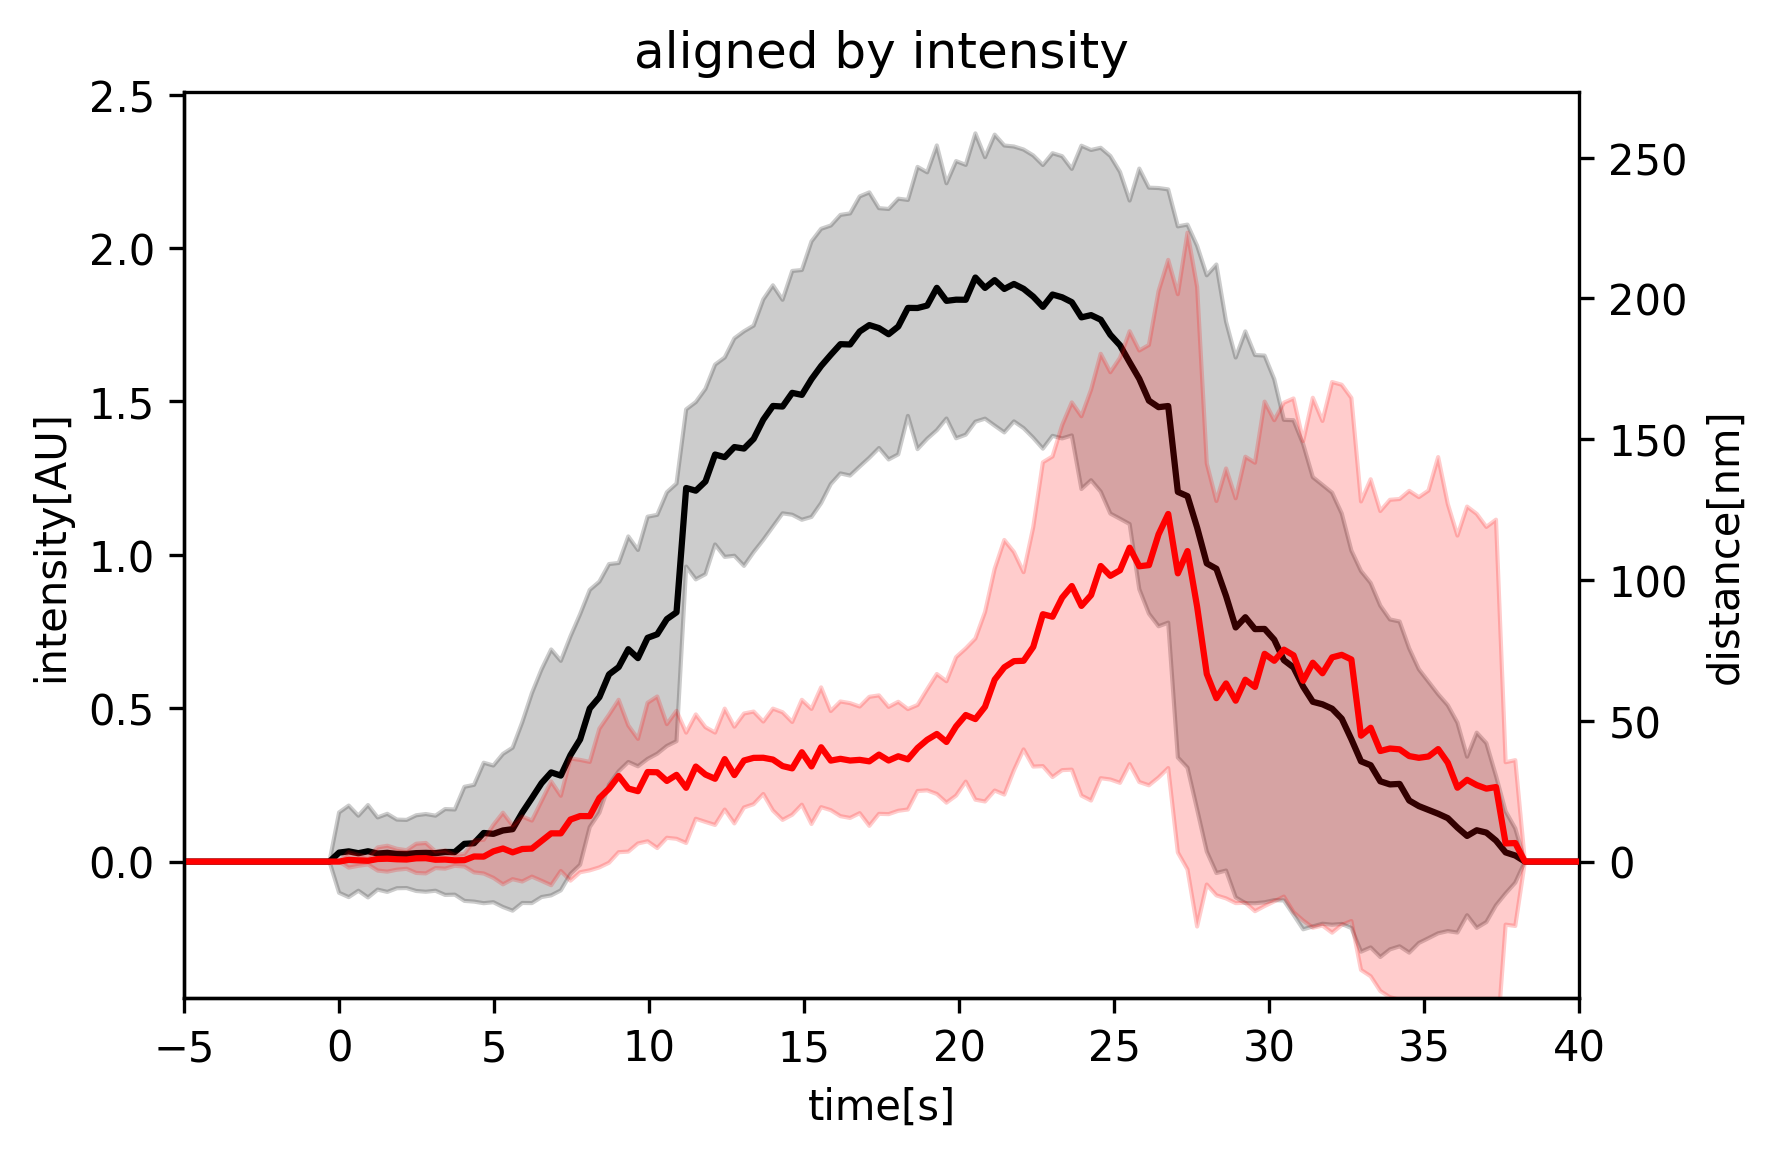

In [19]:



fig, ax1 = plt.subplots(dpi=300)
ax2 = ax1.twinx() # ax2 and ax1 will have common x axis and different y axis

#time = np.nanmean(adjusted_sampled_times,axis=0)

#intensity

mean = np.nanmean(allFramesAccumulated_intensity,axis=0)
std = np.nanstd(allFramesAccumulated_intensity,axis=0)

#plots the average of intensity
ax1.plot(time,mean,color='k')
#plots the standard deviation of intensity
ax1.fill_between(time, (mean-std), (mean+std),color='k',alpha=0.2)
ax1.set_ylabel('intensity[AU]')

int_mean = mean
int_std = std
int_mean_norm = mean/max(mean)
int_std_norm = std/max(mean)


#distance



mean = np.nanmean(allFramesAccumulated_distance,axis=0)
std = np.nanstd(allFramesAccumulated_distance,axis=0)

#plots the average of intensity
ax2.plot(time,mean,color='r')
#plots the standard deviation of intensity
ax2.fill_between(time, (mean-std) , (mean+std),color='red',alpha=0.2)
ax2.set_ylabel('distance[nm]')

dist_mean = mean
dist_std = std
dist_mean_norm = mean/max(mean)
dist_std_norm = std/max(mean)

ax1.set_xlabel("time[s]")



plt.title("aligned by intensity")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

##########
# Change this to change plotting window (x-axis)
##########
plt.xlim(-5,40)
#ax1.set_ylim(-0.2,1.5)
#ax2.set_ylim(-0.2,1.5)
#plt.xlim(400,700)
align_yaxis(ax1, 0, ax2, 0)

outputFigurePath= outputpath+"plot_alignedByIntensity.png"
print(outputFigurePath)


plt.savefig(outputFigurePath)


df = pd.DataFrame()
df['time[frames]'] = time
df['multi_alignedByIntensity_intensity_mean'] = int_mean
df['multi_alignedByIntensity_intensity_std'] = int_std
df['multi_alignedByIntensity_intensity_mean_normalized'] = int_mean_norm
df['multi_alignedByIntensity_intensity_std_normalized'] = int_std_norm

df['multi_alignedByIntensity_distance_mean'] = dist_mean
df['multi_alignedByIntensity_distance_std'] = dist_std
df['multi_alignedByIntensity_distance_mean_normalized'] = dist_mean_norm
df['multi_alignedByIntensity_distance_std_normalized'] = dist_std_norm

outputDataFilePath = outputpath+'output_alignedByIntensity.csv'
df.to_csv(outputDataFilePath)